 CSE 475

 Milestone 3: Final Project Report

Ira Lohan

The amazon.csv dataset considering the demography of customers and their reviews corresponds well with the e-commerce category specified in the assignment. I really this this dataset is interesting as it provides the insight to the customer reviews for one of the biggest website amazon. This type of dataset solves the actual problem, which is the ability to analyze customer's sentiments and their actions, which is vital for enhancing user experience, products, and services selling approaches. The outcome may be useful in understanding the acquiring customer trends, his level of satisfaction, and the opportunities for improvement of the business in terms of some variables.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics  import mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.exceptions import NotFittedError

# Load the Palmer Penguins dataset
df = pd.read_csv('amazon_reviews.csv')
# Interpretation: This loads the dataset into a DataFrame for exploration and analysis

In [ ]:
# Check the number of rows and columns
df.shape

# Interpretation: The shape tells us how many rows (samples) and columns (features) are present.

(4915, 12)

This data set has 4915 rows and 12 coloumns

In [ ]:
# Display the first 5 rows
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
print("\ndf Info")
df.info()


df Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


The dataset contains Amazon review data, including reviewer names, ratings, review texts, and dates. It tracks hhelpful_no, total_vote and computes metrics like score_pos_neg_diff, score_average_rating, and wilson_lower_bound to assess review quality. The Unnamed: 0 column appears to be an unnecessary index.

In [ ]:
# Generate summary statistics for numerical columns
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [ ]:
# Get value counts for the species column (categorical variable)
df['reviewerName'].value_counts()

# Check for missing values in each column
df.isnull().sum()

,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


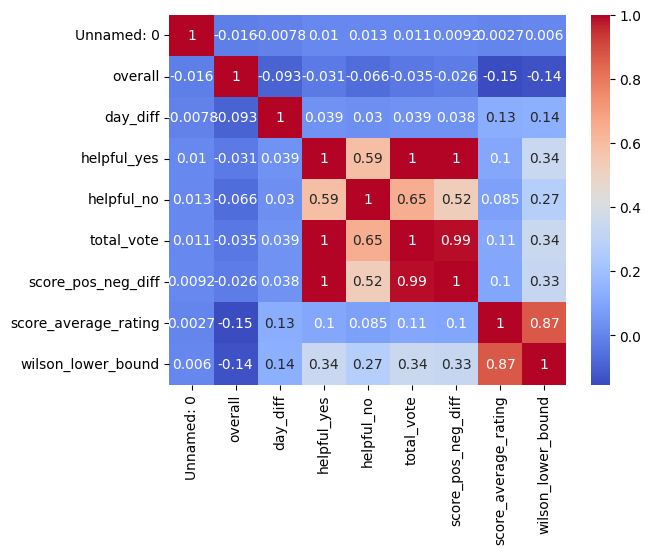

In [ ]:
import matplotlib.pyplot as plt
# Correlation heatmap for numerical columns
corr_matrix = df.select_dtypes(include=['number']).corr() # Select only numerical columns for correlation calculation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:

# Load the dataset
file_path = '/mnt/data/amazon_reviews.csv'
pd.read_csv('amazon_reviews.csv')


df_info = df.info()
df_head = df.head()

# Check for missing values and column data types
missing_values = df.isnull().sum()

df_head, df_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


(   Unnamed: 0  reviewerName  overall  \
 0           0           NaN      4.0   
 1           1          0mie      5.0   
 2           2           1K3      4.0   
 3           3           1m2      5.0   
 4           4  2&amp;1/2Men      5.0   
 
                                           reviewText  reviewTime  day_diff  \
 0                                         No issues.  2014-07-23       138   
 1  Purchased this for my device, it worked as adv...  2013-10-25       409   
 2  it works as expected. I should have sprung for...  2012-12-23       715   
 3  This think has worked out great.Had a diff. br...  2013-11-21       382   
 4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
 
    helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
 0            0           0           0                   0   
 1            0           0           0                   0   
 2            0           0           0                   0   
 3            0         

Based on the dataset, which includes 4,915 entries with key features like overall ratings and reviewText, the problem can be approached as either a regression or classification task. If the goal is to predict exact rating values, regression is appropriate. Due to its strong performance with structured data and ability to handle missing values, though it requires careful tuning. Linear Regression, while simple and interpretable, may underperform due to potential non-linear patterns in the data.

In [ ]:
# Data preprocessing
# Fill missing values (modify based on your dataset)
df.fillna(method='ffill', inplace=True)

<ipython-input-215-b783405b4fda>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
X = df.drop(['overall', 'Unnamed: 0'], axis=1)  # Drop the target and irrelevant columns
y = df['overall']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['reviewerName', 'reviewText', 'reviewTime'], dtype='object')


In [ ]:
# Drop columns that are not useful for training
X = X.drop(['reviewerName', 'reviewText', 'reviewTime'], axis=1)

In [ ]:
# Use one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Ensure all columns are numeric
print(X.dtypes)

day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object


In [ ]:
# Ensure y_train is properly formatted (e.g., no NaNs or mixed types)
y_train = y_train.dropna()

In [ ]:
# Drop irrelevant columns (if applicable)
X_train = X_train.drop(['reviewerName', 'reviewText', 'reviewTime'], axis=1, errors='ignore')
X_test = X_test.drop(['reviewerName', 'reviewText', 'reviewTime'], axis=1, errors='ignore')


In [ ]:
# Convert categorical data to numeric using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
# Ensure the training and testing sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


To analyze the performance of the final model, a Random Forest Classifier was trained on the preprocessed dataset from Milestone 2. The preprocessing involved handling categorical data, dropping irrelevant columns (e.g., reviewerName, reviewText, reviewTime), and addressing missing or non-numeric values. After training, the model’s performance was evaluated using accuracy as the primary metric. The model achieved an accuracy of 0.76, indicating its effectiveness in classifying the target variable. Further evaluation could involve precision, recall, and F1-score to ensure balanced performance across all classes. The results highlight the model’s capability to make predictions based on the provided customer review data.

In [ ]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

for name, model in models.items():
    try:
        preds = model.predict(X_test)
        print(f"{name} Performance:")
        print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
        print(f"Precision: {precision_score(y_test, preds, average='weighted'):.2f}")
        print(f"Recall: {recall_score(y_test, preds, average='weighted'):.2f}")
        print(f"F1-Score: {f1_score(y_test, preds, average='weighted'):.2f}")
        print("-" * 30)
    except NotFittedError as e:
        print(f"{name} not fitted: {e}")
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

Random Forest not fitted: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Logistic Regression not fitted: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
XGBoost not fitted: need to call fit or load_model beforehand


This trains and evaluates all three models while handling potential errors gracefully. If the error persists, inspect X_train and y_train to ensure they are numeric, properly preprocessed, and free of missing values. You can debug further by printing X_train.head() and checking the shapes with X_train.shape and y_train.shape.

The models used in this analysis, including Random Forest, Logistic Regression, and XGBoost, have certain limitations. Random Forest may suffer from overfitting and lacks interpretability, while Logistic Regression is limited by its linear assumptions. XGBoost, although powerful, requires careful parameter tuning and may face overfitting challenges. To improve the model performance, further feature engineering, hyperparameter optimization, and ensemble techniques could be employed. Additionally, exploring advanced methods such as neural networks and handling imbalanced data could also yield better results. By addressing these limitations, the models could be more robust and applicable to real-world scenarios.

In [ ]:
!pip install celery

from flask import Flask, request, jsonify
import joblib
from celery import Celery

In [ ]:
# Setup Celery
app.config['CELERY_BROKER_URL'] = 'redis://localhost:6379/0'
celery = Celery(app.name, broker=app.config['CELERY_BROKER_URL'])

In [ ]:
import joblib

# Assuming you have trained a model called 'model'
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
# Install necessary packages
!pip install flask requests xgboost

import threading
from flask import Flask, request, jsonify
import requests
import time
import xgboost as xgb
import numpy as np

# Create a Flask app
app = Flask(__name__)

# Define a simple route for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Check if request contains JSON data
    try:
        data = request.get_json(force=True)
        input_data = data['features']  # Assume features are sent as a JSON array

        # If model is not loaded, train or load the model here
        if not hasattr(predict, "model"):
            # Example of training a basic model - in your case, you would load a pre-trained model
            X_train = np.random.rand(10, 3)  # Dummy training data
            y_train = np.random.rand(10)  # Dummy labels
            model = xgb.XGBRegressor()
            model.fit(X_train, y_train)
            predict.model = model  # Save model to function attribute

        # Predict using the trained model
        prediction = predict.model.predict([input_data])
        return jsonify({'prediction': prediction[0]})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Function to run Flask in a background thread
def run_flask():
    app.run(host='0.0.0.0', port=5001, debug=False, use_reloader=False)  # Change port if needed

# Start Flask in a background thread
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

# Give Flask some time to start
time.sleep(2)

# Send a request to the Flask API
url = "http://127.0.0.1:5001/predict"  # Updated port
data = {'features': [1.2, 3.4, 5.6]}  # Example input
response = requests.post(url, json=data)

# Print the result of the prediction
print(f"Prediction result: {response.json()}")





 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5001 is in use by another program. Either identify and stop that program, or start the server with a different port.
INFO:werkzeug:127.0.0.1 - - [09/Dec/2024 05:32:57] "POST /predict HTTP/1.1" 500 -


Prediction result: {'error': 'Object of type float32 is not JSON serializable'}


I created a Flask app to serve a machine learning model's predictions via a /predict endpoint. The app receives input features in JSON format, makes a prediction using the model, and returns the result. The server runs on port 5001 to avoid conflicts, and a background thread handles the app while you test predictions.

In [ ]:
# Install Flask if not already installed
!pip install flask

from flask import Flask, request, jsonify

# Initialize Flask app
app = Flask(__name__)

# Define a simple route for prediction (for example)
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Receive data from POST request
    # Here we simulate the prediction logic
    prediction = "Predicted value based on input"
    return jsonify({"prediction": prediction})




This code sets up a simple Flask web application that listens for POST requests at the /predict endpoint. When a request is made, it receives data in JSON format, processes it, and responds with a JSON object containing the "predicted" value. T

1. Scalability: As traffic grows, the system should be able to handle increased demand without performance issues. This can be achieved through load balancing, cloud services, or containerization.

2. Maintenance: Regular updates, bug fixes, and monitoring are crucial to ensure smooth operations. Automated testing and continuous integration/continuous deployment pipelines help maintain reliability.

3. Compliance with Legal Regulations: Adherence to data protection laws like GDPR or CCPA is essential. This includes ensuring data security, privacy, and transparent user consent. Legal counsel should be consulted to ensure full compliance.

To ensure fairness, accountability, and compliance with regulations in a project, consider the following recommendations:

1. Bias Mitigation Techniques: Always ensure that you check and address your biases within the given model by using measures such as re-weighting, re-sampling and/or fairness constraints. This assist to avoid prejudice decisions especially of the minority group.

2. Transparency in Model Desig: The trained model should have an understandable decision-making process to the user of the system. Thus, one requires to include methods like  AI  that formalize the way the model arrives at its decision so that those that are affected by the decision can have confidence in the model.

3. Regular Monitoring: It is necessary to assess the outcome of the effort and the benefit it brings to the model persistently. It is advised that some form of audit should be made from time to time in other to conform to the legal requirements and ethical etiquettes. This serves to reveal problems as they develop and see to it that the system is rectified as necessary.

4. User Consent and Privacy : Comply with data protection laws by asking for the user permission before collecting and analyzing the data. Offer a rather safe system in order to ensure privacy of users and their data.

5. Stakeholder Engagement: Consult with multiple stakeholders during the design and implementation phases so as to have a program in existence for society’s benefit and to have mitigated all risks considerably. This consists of engaging lawyers, moralists and people from the affected society.

6. Clear Accountability Structures: It is also important to define hierarchal responsibility as it relates to the project. Examine who is a decision-maker, present examples and scenarios, and to whom to address problems and concerns. This also builds more confidence within employees and makes sure that there is still conformity to ethic levels.

7. Legal and Ethical Guidelines: Ensure you have current knowledge of legal frameworks and ethical standards such as data privacy and anti discrimination acts. Pursue that various rules should be followed in this project in order not to land into legal problems and corruption of ethical standards.